In [1]:
import numpy as np
import pandas as pd

In [3]:

import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin1')
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=[' Unnamed: 2',' Unnamed: 3',' Unnamed: 4'],inplace=True)

KeyError: "[' Unnamed: 2', ' Unnamed: 3', ' Unnamed: 4'] not found in axis"

In [7]:
df.sample(S)

NameError: name 'S' is not defined

In [8]:
# Drop last 3 columns by position
df.drop(df.columns[-3:], axis=1, inplace=True)


In [9]:
df.sample(5)

,v1,v2
18,ham,Fine if thatåÕs the way u feel. ThatåÕs the wa...
4923,ham,We can go 4 e normal pilates after our intro...
2530,ham,So the sun is anti sleep medicine.
278,ham,Just sent it. So what type of food do you like?
2320,ham,This pain couldn't have come at a worse time.


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2735,ham,I meant middle left or right?
2569,ham,Ultimately tor motive tui achieve korli.
4160,spam,Had your mobile 11 months or more? U R entitle...
4129,ham,And by when you're done I mean now
3830,ham,Let's pool our money together and buy a bunch ...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(403)

In [20]:
df = df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.shape

(5169, 2)

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

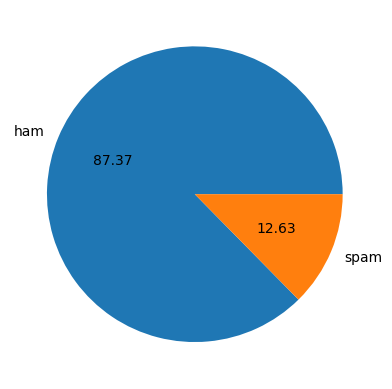

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [30]:
import nltk

In [ ]:
!pip install nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [36]:
df['num_characters'] = df['text'].apply(len)


In [37]:
df.head()

,target,text,text_length,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,111
1,0,Ok lar... Joking wif u oni...,29,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,0,U dun say so early hor... U c already then say...,49,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61


In [38]:
df.drop(columns=['text_length'], inplace=True)


In [39]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule/nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [43]:
import nltk

# Download the standard Punkt tokenizer (English)
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
# Tokenize each text
df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

# Check the result
print(df[['text', 'tokens']].head())


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule/nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [45]:
nltk.download('punkt', download_dir='C:\\Users\\Diksha Landghule\\nltk_data')
nltk.data.path.append('C:\\Users\\Diksha Landghule\\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [46]:
df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule/nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\nltk_data'
**********************************************************************


In [47]:
import nltk

# Set a folder where NLTK will store its data
nltk.data.path.append(r'C:\Users\Diksha Landghule\nltk_data')


In [48]:
# Download punkt into the folder you just set
nltk.download('punkt', download_dir=r'C:\Users\Diksha Landghule\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
from nltk.tokenize import word_tokenize

# Test tokenization
sample_text = "Hello world! This is a test."
tokens = word_tokenize(sample_text)
print(tokens)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule/nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\nltk_data'
**********************************************************************


In [50]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
from nltk.tokenize import word_tokenize

sample_text = "Hello world! This is a test."
tokens = word_tokenize(sample_text)
print(tokens)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule/nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\nltk_data'
**********************************************************************


In [54]:
from nltk.tokenize import word_tokenize

# Test tokenization on a sample
sample_text = "Hello world! This is a test."
tokens = word_tokenize(sample_text)
print(tokens)
# Output should be: ['Hello', 'world', '!', 'This', 'is', 'a', 'test', '.']

# Tokenize your SMS dataset
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))

# Check first 5 rows
df[['text', 'tokens']].head()


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule/nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\nltk_data'
**********************************************************************


In [55]:
import nltk

# Force download the correct tokenizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
from nltk.tokenize import word_tokenize

sample_text = "Hello world! This is a test."
tokens = word_tokenize(sample_text)
print(tokens)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule/nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\nltk_data'
    - 'C:\\Users\\Diksha Landghule\\nltk_data'
**********************************************************************


In [57]:
import nltk
import os

# Force NLTK to look for data in the standard path
nltk_data_path = os.path.join(os.path.expanduser("~"), "AppData", "Roaming", "nltk_data")
nltk.data.path = [nltk_data_path]

# Just to make sure, download punkt here
nltk.download('punkt', download_dir=nltk_data_path)


[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
from nltk.tokenize import word_tokenize

sample_text = "Hello world! This is a test."
tokens = word_tokenize(sample_text)
print(tokens)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
**********************************************************************


In [59]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Clear any cached tokenizer paths
nltk.data.path = []

# Force download of the correct punkt tokenizer
nltk.download('punkt', quiet=True)


True

In [60]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

sample_text = "Hello world! This is a test."
tokens = tokenizer.tokenize(sample_text)
print(tokens)


['Hello', 'world', '!', 'This', 'is', 'a', 'test', '.']


In [62]:
df['num_words'] = df['text'].apply(lambda x: tokenizer.tokenize(x))
df[['text', 'tokens']].head()


,text,tokens
0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab..."
1,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [63]:
df.head()

,target,text,num_characters,tokens,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy.., Availab...","[Go, until, jurong, point, ,, crazy.., Availab..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [64]:
from nltk.tokenize import TreebankWordTokenizer

# Initialize tokenizer
tokenizer = TreebankWordTokenizer()

# Count words for each row
df['num_words'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

# Drop the old tokens column if you want
if 'tokens' in df.columns:
    df = df.drop(columns=['tokens'])

# Show the updated DataFrame
print(df.head())


   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         23  
1          8  
2         36  
3         13  
4         15  


In [65]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
**********************************************************************


In [66]:
import nltk

# Make sure the correct tokenizer is downloaded
nltk.download('punkt')

# Optional: check where NLTK is looking for data
print(nltk.data.path)


[]


[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

# Count words in each row
df['num_words'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

# Drop old tokens column if it exists
if 'tokens' in df.columns:
    df = df.drop(columns=['tokens'])

print(df.head())


   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         23  
1          8  
2         36  
3         13  
4         15  


In [68]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
**********************************************************************


In [69]:
# If you haven't already
import pandas as pd

# Sample DataFrame
# df = pd.read_csv("your_sms_data.csv")

# Number of characters in each message
df['num_characters'] = df['text'].apply(len)

# Number of words in each message (split by space)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

# Number of sentences (split by '.', '!', '?')
import re
df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', x)) - (1 if x[-1] not in '.!?' else 0))

# Drop tokens column if exists
if 'tokens' in df.columns:
    df = df.drop(columns=['tokens'])

# Show result
print(df.head())


   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         20              4  
1          6              3  
2         28              1  
3         11              3  
4         13              0  


In [70]:
df[[' num_characters',' num_words','num_sentences']].describe()

KeyError: "[' num_characters', ' num_words'] not in index"

In [71]:
print(df.columns.tolist())


['target', 'text', 'num_characters', 'num_words', 'num_sentences']


In [72]:
df[['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.352293
std,58.236293,11.068488,1.914962
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,40.000000


In [74]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.244021
std,56.358207,11.116240,1.892989
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,3.000000
max,910.000000,171.000000,40.000000


In [75]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.101072
std,30.137753,5.967672,1.899842
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [77]:
import seaborn as sns

In [78]:
sns.histplot(df[df['target'] == 0]['	num_characters'])

KeyError: '\tnum_characters'

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

(sns.histplot(df[df['target'] == 0]['num_characters'], kde=True)

sns.histplot(df[df['target'] == 1]['num_characters'], kde=True),color = red)
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (265202821.py, line 4)

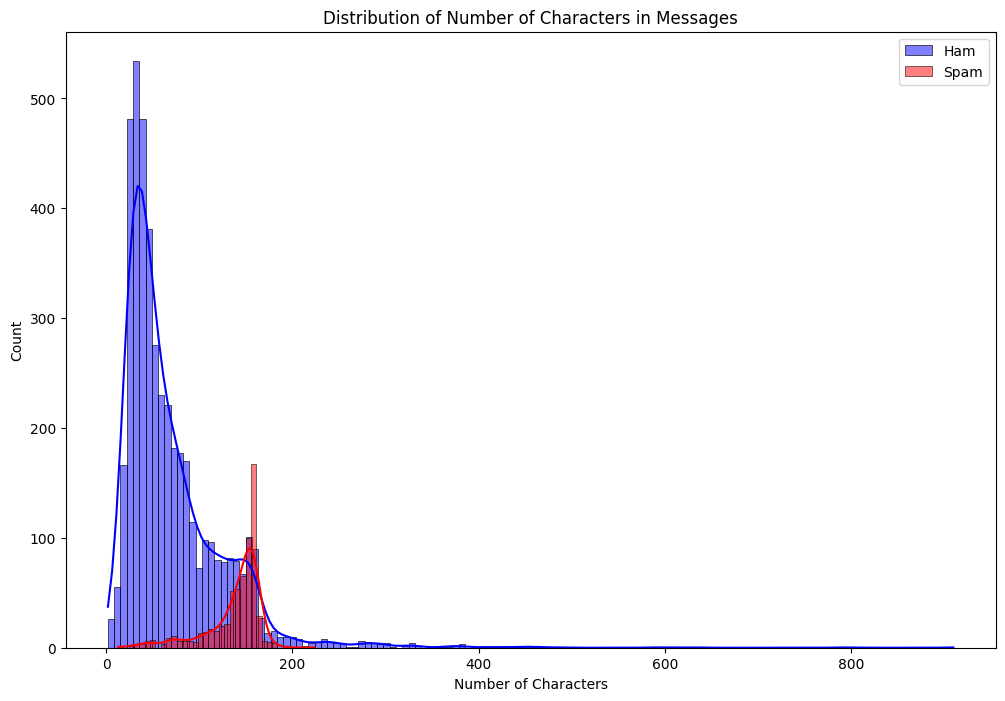

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Plotting both histograms on the same figure
sns.histplot(df[df['target'] == 0]['num_characters'], kde=True, color='blue', label='Ham')
sns.histplot(df[df['target'] == 1]['num_characters'], kde=True, color='red', label='Spam')

plt.legend()
plt.xlabel('Number of Characters')
plt.title('Distribution of Number of Characters in Messages')
plt.show()


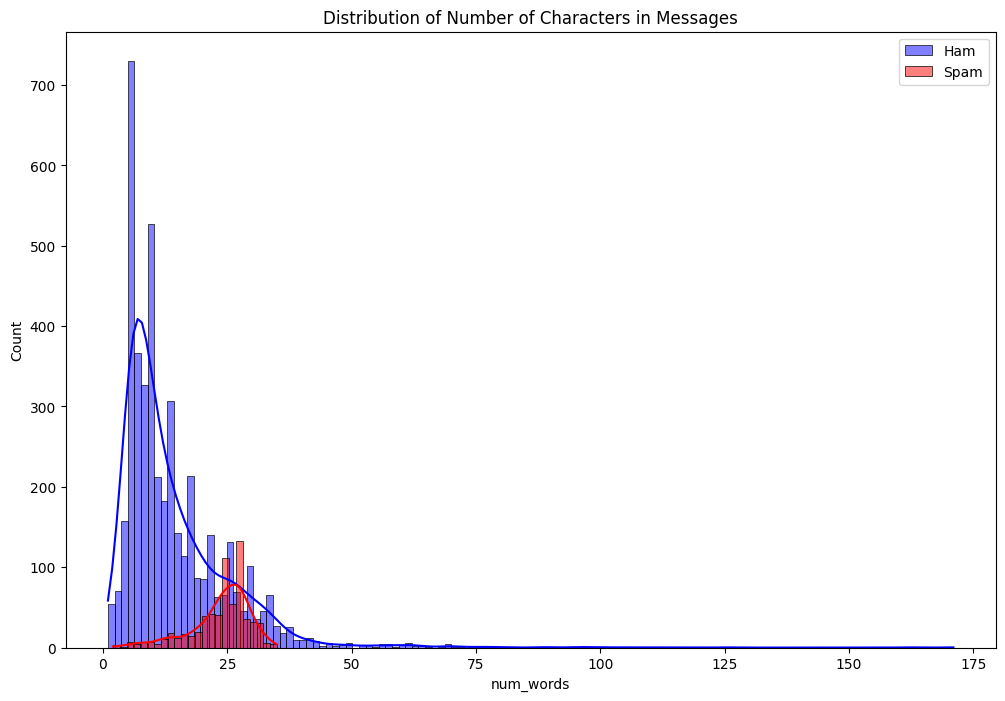

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Plotting both histograms on the same figure
sns.histplot(df[df['target'] == 0]['num_words'], kde=True, color='blue', label='Ham')
sns.histplot(df[df['target'] == 1]['num_words'], kde=True, color='red', label='Spam')

plt.legend()

plt.title('Distribution of Number of Characters in Messages')
plt.show()

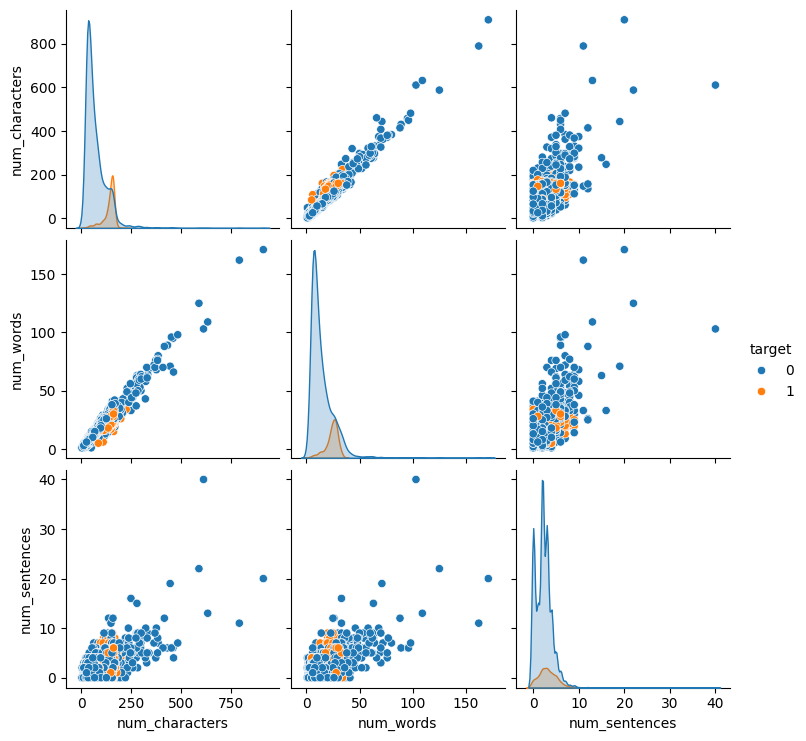

In [84]:
sns.pairplot(df,hue='target')

In [85]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [86]:
corr_matrix = df.select_dtypes(include='number').corr()
print(corr_matrix)


                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.286576       0.148701
num_characters  0.384717        1.000000   0.973667       0.549960
num_words       0.286576        0.973667   1.000000       0.532005
num_sentences   0.148701        0.549960   0.532005       1.000000


In [87]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

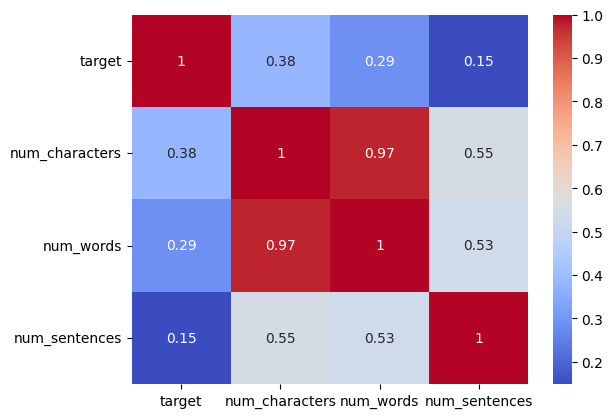

In [88]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [94]:
def transform_text (text):
    text= text.lower()
    text = nltk.word_tokenize(text)
    return text

In [95]:
transform_text('Hi how are you')

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
**********************************************************************


In [97]:
import nltk

# Download the standard tokenizer
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def transform_text(text):
    text = text.lower()             # Lowercase
    tokens = word_tokenize(text)    # Tokenize using standard punkt
    return tokens
    

# Test it
print(transform_text("Hi how are you"))

[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
**********************************************************************


In [98]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import os

# Clear NLTK cache (sometimes old paths cause issues)
nltk.data.path = [os.path.expanduser('~\\AppData\\Roaming\\nltk_data')]

# Re-download the correct punkt just in case
nltk.download('punkt')

# Test
text = "Hi how are you"
tokens = word_tokenize(text)
print(tokens)


[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
**********************************************************************


In [104]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
text = "Hi how are you"
tokens = tokenizer.tokenize(text)
y = []
for i in text:
    if i.isalnum():
        y.append(i)
retuen y
print(tokens)


SyntaxError: invalid syntax (2372392466.py, line 10)

In [103]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [114]:
from nltk.tokenize import TreebankWordTokenizer

def transform_text(text):
    tokenizer = TreebankWordTokenizer()
    text = text.lower()                       # lowercase
    tokens = tokenizer.tokenize(text)         # tokenize
    tokens = [token for token in tokens if token.isalnum()]  # keep only alphanumeric
    return tokens

# Test
print(transform_text("hi how are you?"))


['hi', 'how', 'are', 'you']


In [108]:
from nltk.corpus import stopwords
stopwords.words("english")

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
**********************************************************************


In [106]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [109]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [110]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
print(list(stop_words)[:10])  # show first 10 stopwords


['but', "hadn't", 'him', 't', 'between', 'while', 'above', "you're", 'being', 'before']


In [111]:
import string

# Custom stopwords list (you can expand if needed)
stop_words = set([
    'i','me','my','myself','we','our','ours','ourselves','you','your','yours',
    'yourself','yourselves','he','him','his','himself','she','her','hers',
    'herself','it','its','itself','they','them','their','theirs','themselves',
    'what','which','who','whom','this','that','these','those','am','is','are',
    'was','were','be','been','being','have','has','had','having','do','does',
    'did','doing','a','an','the','and','but','if','or','because','as','until',
    'while','of','at','by','for','with','about','against','between','into',
    'through','during','before','after','above','below','to','from','up','down',
    'in','out','on','off','over','under','again','further','then','once','here',
    'there','when','where','why','how','all','any','both','each','few','more',
    'most','other','some','such','no','nor','not','only','own','same','so','than',
    'too','very','s','t','can','will','just','don','should','now'
])

def transform_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Split into words
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Example usage:
sample_text = "Hi how are you doing today? I hope you are well!"
clean_tokens = transform_text(sample_text)
print(clean_tokens)


['hi', 'today', 'hope', 'well']


In [112]:
df['clean_text'] = df['text'].apply(transform_text)


In [113]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [115]:
import nltk
import string

# Make sure these are downloaded
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def transform_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Tokenize
    tokens = word_tokenize(text)
    
    # 3. Keep only alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum()]
    
    # 4. Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english') 
              and word not in string.punctuation]
    
    # 5. Return the list (empty if nothing remains)
    return tokens

# Examples
print(transform_text("Hi how are you 20% eg"))   # ['hi', '20', 'eg']
print(transform_text("the and or !!!"))          # []
print(transform_text("!!! 123 %"))               # ['123']


[nltk_data] Downloading package punkt to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Diksha Landghule\\AppData\\Roaming\\nltk_data'
**********************************************************************


In [116]:
import re
import nltk
import string

nltk.download('stopwords')
from nltk.corpus import stopwords

def transform_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation using regex
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Split by spaces
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    return tokens

# Test examples
print(transform_text("Hi how are you 20% eg"))   # ['hi', '20', 'eg']
print(transform_text("the and or !!!"))          # []
print(transform_text("!!! 123 %"))               # ['123']


['hi', '20', 'eg']
[]
['123']


[nltk_data] Downloading package stopwords to C:\Users\Diksha
[nltk_data]     Landghule\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
from nltk.stem.porter import PosterStemmer
ps = PosterStemmer()
ps.stem('loving')

ImportError: cannot import name 'PosterStemmer' from 'nltk.stem.porter' (C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\stem\porter.py)

In [118]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
word = "loving"
stemmed_word = ps.stem(word)

print(stemmed_word)  # Output: 'love'


love


In [120]:
df['transformed_text'] = df['text'].apply(transform_text)

In [121]:
df.head()

,target,text,num_characters,num_words,num_sentences,clean_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,4,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,6,3,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,11,3,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goes, usf, lives, around, t..."


In [122]:
df.drop(columns=['clean_text'], inplace=True)


In [123]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,4,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,6,3,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,11,3,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,"[nah, dont, think, goes, usf, lives, around, t..."


In [125]:
from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [129]:
 spam_wc = wc.generate(df[df['target'] == ['transformed_text'].str.cat(sep=' ')])

AttributeError: 'list' object has no attribute 'str'

In [130]:
text_spam = df[df['target'] == 1]['transformed_text'] \
              .apply(lambda x: " ".join(x)) \
              .str.cat(sep=' ')

wc.generate(text_spam)


In [135]:
plt.inshow(show_wc)

AttributeError: module 'matplotlib.pyplot' has no attribute 'inshow'

In [136]:
plt.imshow(spam_wc)
plt.axis("off")
plt.show()


NameError: name 'spam_wc' is not defined

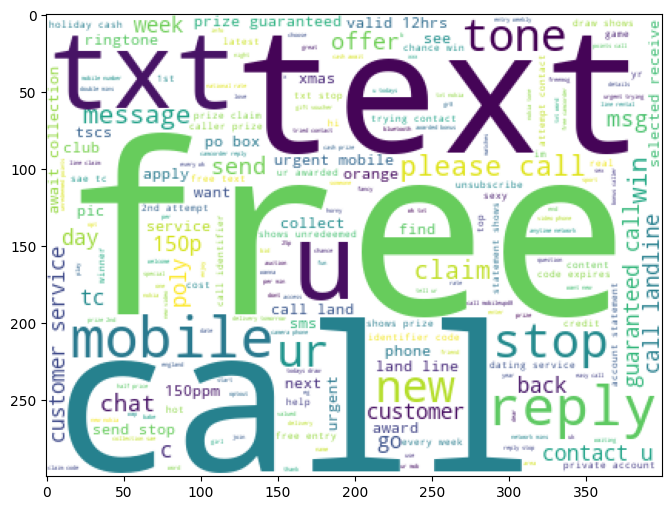

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join your transformed_text into one string
text_data = df[df['target'] == 1]['transformed_text'] \
              .apply(lambda x: " ".join(x)) \
              .str.cat(sep=' ')

# Create wordcloud
wc = WordCloud(
    width=400,
    height=300,
    background_color='white'
)

wc.generate(text_data)

# Plot
plt.figure(figsize=(15,6))
plt.imshow(wc)

# 🔹 IMPORTANT: show axis numbers
plt.axis("on")

plt.show()


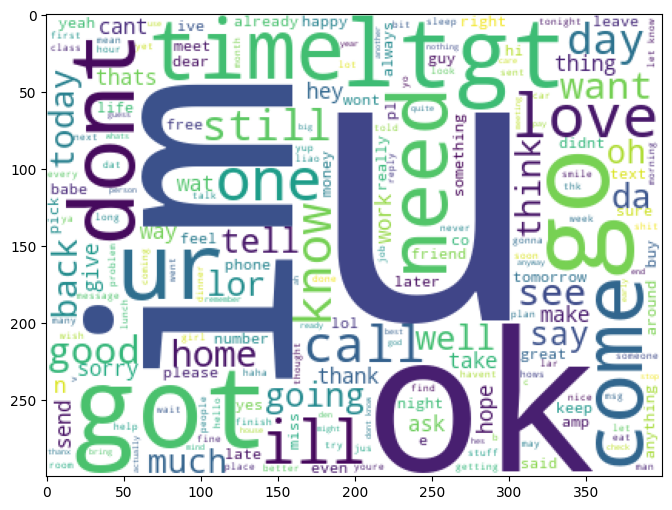

In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join your transformed_text into one string
text_data = df[df['target'] == 0]['transformed_text'] \
              .apply(lambda x: " ".join(x)) \
              .str.cat(sep=' ')

# Create wordcloud
wc = WordCloud(
    width=400,
    height=300,
    background_color='white'
)

wc.generate(text_data)

# Plot
plt.figure(figsize=(15,6))
plt.imshow(wc)

# 🔹 IMPORTANT: show axis numbers
plt.axis("on")

plt.show()


In [142]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,4,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,6,3,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,11,3,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,"[nah, dont, think, goes, usf, lives, around, t..."


In [146]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(word)

AttributeError: 'list' object has no attribute 'split'

In [147]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text']:
    for word in msg:
        spam_corpus.append(word)


In [148]:
len(spam_corpus)

10803

In [150]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

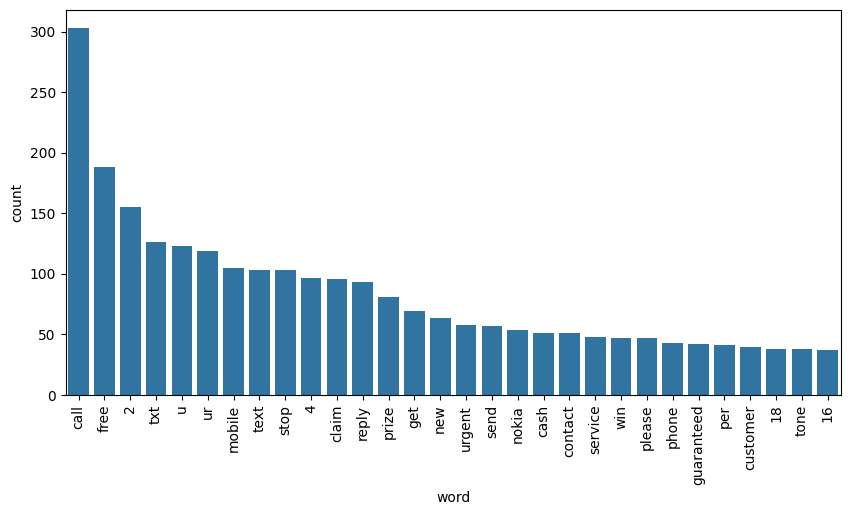

In [151]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Build spam corpus (YOUR logic fixed)
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text']:
    for word in msg:          # msg is already a list
        spam_corpus.append(word)

# Convert to DataFrame
spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=spam_df, x='word', y='count')
plt.xticks(rotation=90)
plt.show()


In [152]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

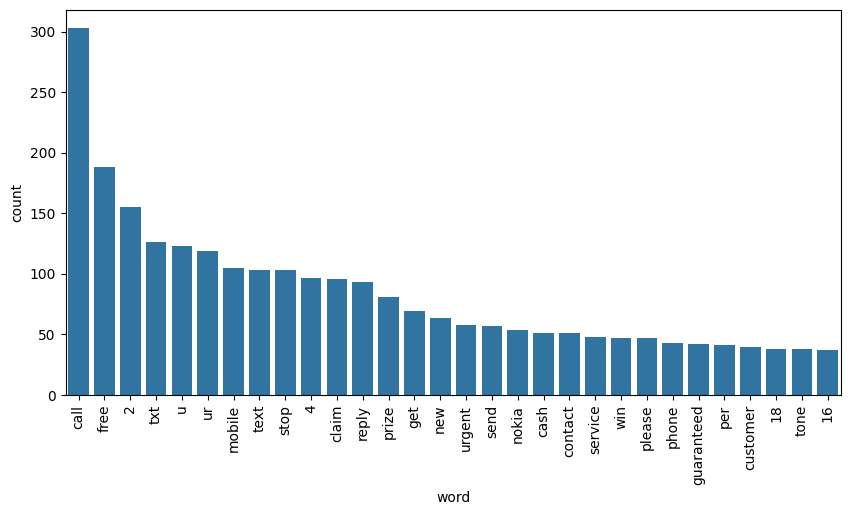

In [153]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert spam_corpus to DataFrame
spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)

# Plot correctly
plt.figure(figsize=(10,5))
sns.barplot(data=spam_df, x='word', y='count')
plt.xticks(rotation=90)
plt.show()


C:\Users\Diksha Landghule\AppData\Local\Temp\ipykernel_12808\2294333163.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


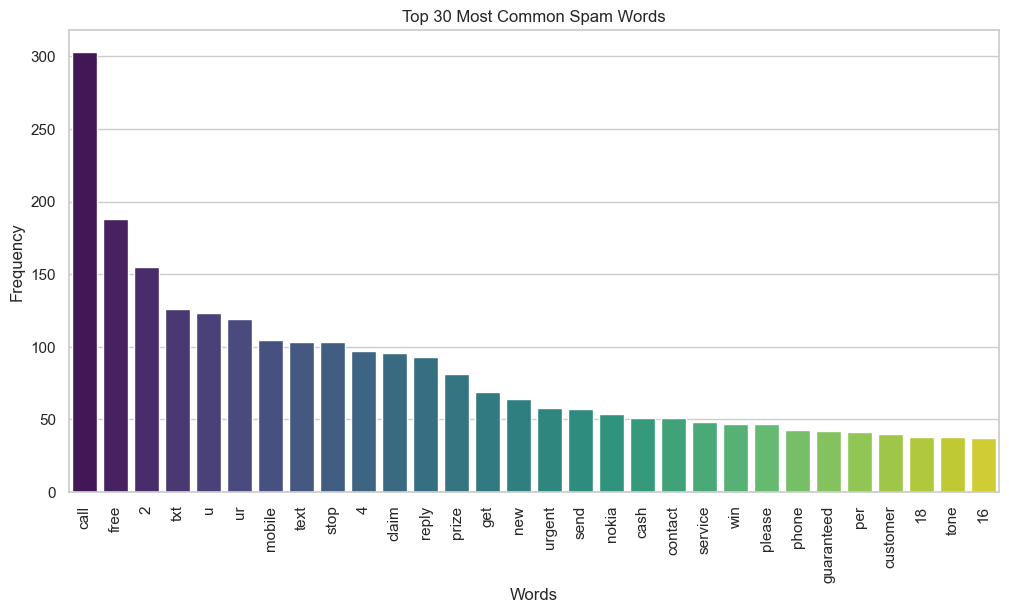

In [154]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)

# Set style
sns.set(style="whitegrid")

# Plot (COLORFUL)
plt.figure(figsize=(12,6))
sns.barplot(
    data=spam_df,
    x='word',
    y='count',
    palette='viridis'   # 🎨 colorful palette
)

plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Spam Words")

plt.show()


In [155]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

AttributeError: 'list' object has no attribute 'split'

In [156]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text']:
    for word in msg:     # msg is already a list
        ham_corpus.append(word)


In [157]:
len(ham_corpus)

36720

In [158]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
spam_df = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=['word', 'count']
)

# Set style
sns.set(style="whitegrid")

# Plot (COLORFUL)
plt.figure(figsize=(12,6))
sns.barplot(
    data=ham_df,
    x='word',
    y='count',
    palette='viridis'   # 🎨 colorful palette
)

plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Spam Words")

plt.show()


NameError: name 'ham_df' is not defined

<Figure size 1200x600 with 0 Axes>

In [159]:
# Step 1: Import libraries
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create a corpus for ham messages (target=0)
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    # msg is already a list of words
    for word in msg:
        ham_corpus.append(word)

# Step 3: Count most common words
ham_word_counts = Counter(ham_corpus)
# Get top 30
top_ham = ham_word_counts.most_common(30)

# Step 4: Create DataFrame for plotting
ham_df = pd.DataFrame(top_ham, columns=['word','count'])

# Step 5: Plot using seaborn (colorful)
plt.figure(figsize=(12,6))
sns.barplot(
    data=ham_df,
    x='word',
    y='count',
    palette='viridis'   # 🎨 colorful palette
)

plt.xticks(ro


SyntaxError: incomplete input (282348390.py, line 31)

C:\Users\Diksha Landghule\AppData\Local\Temp\ipykernel_12808\1715877370.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


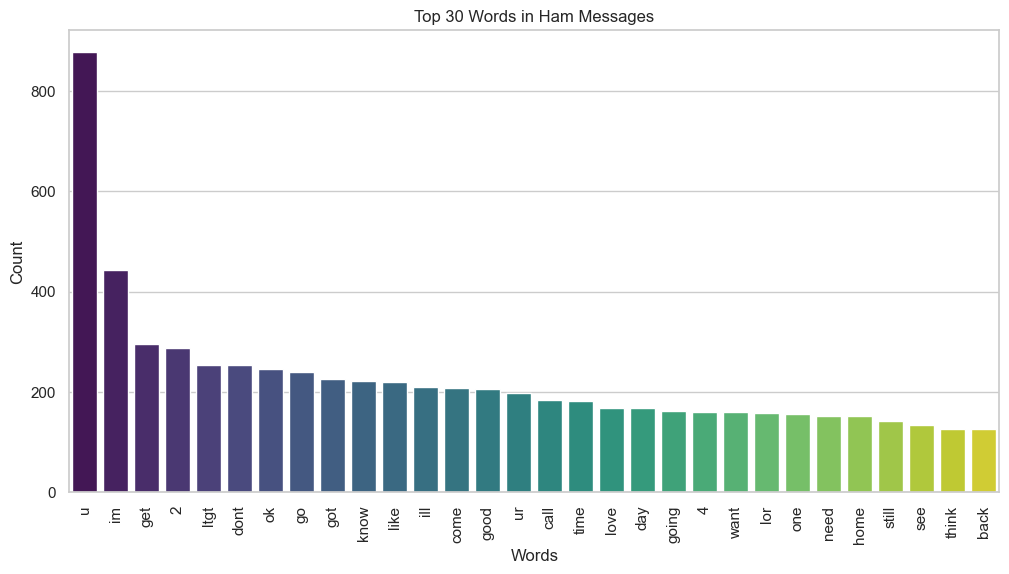

In [160]:
# Step 1: Import libraries
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create a corpus for ham messages (target=0)
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    # msg is already a list of words
    for word in msg:
        ham_corpus.append(word)

# Step 3: Count most common words
ham_word_counts = Counter(ham_corpus)
# Get top 30
top_ham = ham_word_counts.most_common(30)

# Step 4: Create DataFrame for plotting
ham_df = pd.DataFrame(top_ham, columns=['word','count'])

# Step 5: Plot using seaborn (colorful)
plt.figure(figsize=(12,6))
sns.barplot(
    data=ham_df,
    x='word',
    y='count',
    palette='viridis'   # 🎨 colorful palette
)

plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 30 Words in Ham Messages")
plt.show()


In [161]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,4,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,6,3,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,11,3,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,"[nah, dont, think, goes, usf, lives, around, t..."


In [181]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['clean_text_str'])


In [182]:
X = cv.fit_transform(df['transformed_text']).toarray()

AttributeError: 'list' object has no attribute 'lower'

In [183]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Join tokens into a string
df['transformed_text_joined'] = df['transformed_text'].apply(lambda x: " ".join(x))

# Step 2: Create CountVectorizer instance
cv = CountVectorizer()

# Step 3: Fit and transform
X = cv.fit_transform(df['transformed_text_joined']).toarray()

# Optional: check shape
print(X.shape)


(5169, 9318)


In [184]:
y = df['target'].values

In [185]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [188]:
from sklearn.naive_bayes import GaussianNB,  MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [189]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [190]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

ValueError: could not convert string to float: 'exact intentions'

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Join token lists into strings
df['transformed_text_joined'] = df['transformed_text'].apply(lambda x: " ".join(x))

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['transformed_text_joined'], df['target'], test_size=0.2, random_state=42
)

# Step 3: Vectorize text
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Step 4: Initialize and train Naive Bayes
gnb = MultinomialNB()
gnb.fit(X_train_cv, y_train)

# Step 5: Make predictions
y_pred = gnb.predict(X_test_cv)

# Step 6: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9806576402321083
Confusion Matrix:
 [[884   5]
 [ 15 130]]
Precision: 0.9629629629629629


In [192]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

ValueError: could not convert string to float: 'exact intentions'

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Convert token lists back to string
df['clean_text_str'] = df['transformed_text'].apply(lambda x: " ".join(x))

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text_str'], df['target'], test_size=0.2, random_state=42
)

# Step 3: Vectorize text (convert to numeric)
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Step 4: Train Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)

# Step 5: Predict
y_pred = mnb.predict(X_test_cv)

# Step 6: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9806576402321083
Precision: 0.9629629629629629
Recall: 0.896551724137931
F1 Score: 0.9285714285714286
Confusion Matrix:
 [[884   5]
 [ 15 130]]


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Convert token lists back to string
df['clean_text_str'] = df['transformed_text'].apply(lambda x: " ".join(x))

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text_str'], df['target'], test_size=0.2, random_state=42
)

# Step 3: Vectorize text as binary features
cv = CountVectorizer(binary=True)  # binary=True for BernoulliNB
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Step 4: Train Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_cv, y_train)

# Step 5: Predict
y_pred = bnb.predict(X_test_cv)

# Step 6: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9632495164410058
Precision: 0.9908256880733946
Recall: 0.7448275862068966
F1 Score: 0.8503937007874016
Confusion Matrix:
 [[888   1]
 [ 37 108]]


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [197]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRregression(solver='liblinear',penalty='11')
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
bc = BaggingClassifier(n_estimators=50 , random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb = XGBClassifier(n_estimators=50 , random_state=2)

NameError: name 'LogisticRregression' is not defined

In [199]:
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma='scale')
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [200]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost': abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}
    
    

In [201]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [202]:
train_classifier(svc,X_train,y_train,X_test,y_test)

ValueError: could not convert string to float: 'exact intentions'

In [203]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# Example usage:
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)


ValueError: could not convert string to float: 'exact intentions'

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join lists if needed
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x))

# Vectorize
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text'])
y = df['target']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [205]:
# 1️⃣ Import classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# 2️⃣ Define your classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear')  # fixed typo
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

# 3️⃣ Define a reusable function to train and evaluate
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# 4️⃣ Train all classifiers and store results
classifiers = [svc, mnb, dtc, lrc, rfc, abc, bc, etc, gbdt]
results = {}

for clf in classifiers:
    acc, prec = train_classifier(clf, X_train, y_train, X_test, y_test)
    results[clf.__class__.__name__] = {'Accuracy': acc, 'Precision': prec}

# 5️⃣ Show results
import pandas as pd
results_df = pd.DataFrame(results).T.sort_values(by='Accuracy', ascending=False)
print(results_df)


                            Accuracy  Precision
ExtraTreesClassifier        0.973888   0.982609
SVC                         0.971954   0.973913
RandomForestClassifier      0.971954   1.000000
BaggingClassifier           0.962282   0.915966
MultinomialNB               0.951644   1.000000
GradientBoostingClassifier  0.949710   0.947917
DecisionTreeClassifier      0.938104   0.870000
LogisticRegression          0.936170   0.973684
AdaBoostClassifier          0.933269   0.925926


In [206]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,X_test,y_test)
    print('for',name)
    print('accuracy',current_accuracy)
    print('precision',current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

ValueError: cannot use sparse input in 'SVC' trained on dense data

In [207]:
# Only for SVC, convert sparse to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_dense, y_train)
y_pred = svc.predict(X_test_dense)

from sklearn.metrics import accuracy_score, precision_score
print("SVC Accuracy:", accuracy_score(y_test, y_pred))
print("SVC Precision:", precision_score(y_test, y_pred))


SVC Accuracy: 0.971953578336557
SVC Precision: 0.9739130434782609


In [208]:
performance_df = pd.DataFrame(('algorithm':clfs.keys(),'accuracy':accuracy_scores,'precision':precision_scores

SyntaxError: invalid syntax (2296539033.py, line 1)

In [209]:
performance_df = pd.DataFrame({
    'algorithm': clfs.keys(),
    'accuracy': accuracy_scores,
    'precision': precision_scores
})

performance_df


ValueError: All arrays must be of the same length

In [210]:
# Make sure you have trained all classifiers and collected scores
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    try:
        acc, prec = train_classifier(clf, X_train, y_train, X_test, y_test)
        accuracy_scores.append(acc)
        precision_scores.append(prec)
    except Exception as e:
        print(f"Error with {name}: {e}")
        accuracy_scores.append(None)
        precision_scores.append(None)

# Now all lists will have the same length
performance_df = pd.DataFrame({
    'algorithm': list(clfs.keys()),
    'accuracy': accuracy_scores,
    'precision': precision_scores
})

performance_df


C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,algorithm,accuracy,precision
0,SVC,0.971954,0.973913
1,KN,0.895551,1.000000
2,NB,0.951644,1.000000
3,DT,0.936170,0.860000
4,LR,0.941006,0.913978
5,RF,0.971954,1.000000
6,AdaBoost,0.933269,0.925926
7,BgC,0.962282,0.915966
8,ETC,0.973888,0.982609
9,GBDT,0.949710,0.947917


In [213]:
performance_df1 = pd.melt(performance_df, id_vars = 'algorithm')

In [214]:
performance_df1

,algorithm,variable,value
0,SVC,accuracy,0.971954
1,KN,accuracy,0.895551
2,NB,accuracy,0.951644
3,DT,accuracy,0.936170
4,LR,accuracy,0.941006
5,RF,accuracy,0.971954
6,AdaBoost,accuracy,0.933269
7,BgC,accuracy,0.962282
8,ETC,accuracy,0.973888
9,GBDT,accuracy,0.949710


In [215]:
sns.catplot(x = 'algorthm',y='value',
            hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

ValueError: Could not interpret value `algorthm` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

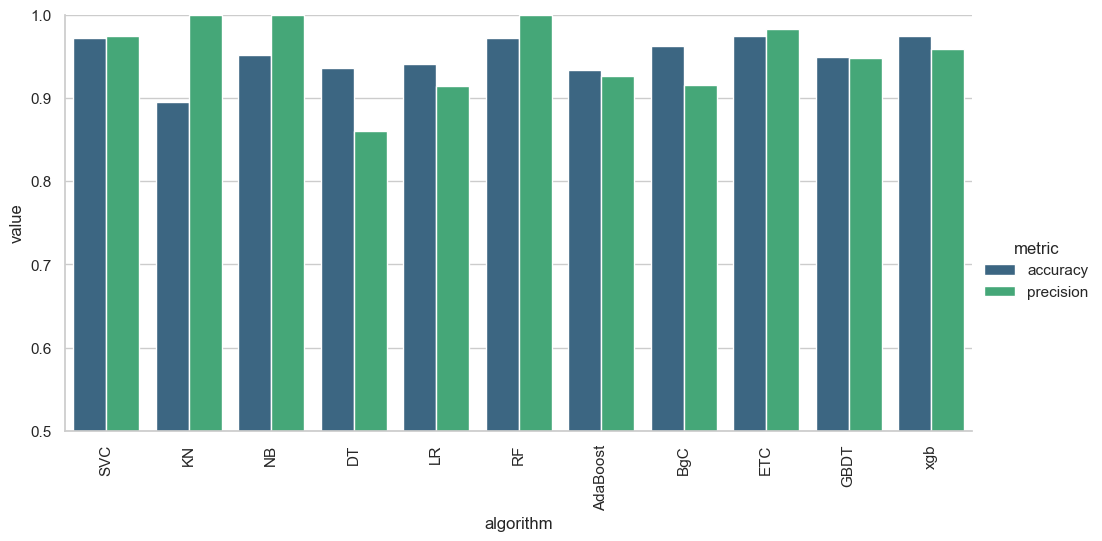

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example long-form DataFrame
performance_df1 = pd.melt(performance_df, id_vars=['algorithm'], 
                          value_vars=['accuracy','precision'], 
                          var_name='metric', value_name='value')

plt.figure(figsize=(12,6))
sns.catplot(
    x='algorithm', 
    y='value', 
    hue='metric', 
    data=performance_df1, 
    kind='bar', 
    height=5,
    aspect=2,
    palette='viridis'   # colorful
)

plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()


In [217]:
performance_df.merge(temp_df,on='Algorithm')

NameError: name 'temp_df' is not defined

In [218]:
import pandas as pd

# Suppose you already have your results
accuracy_scores = [0.95, 0.92, 0.89]   # replace with your real scores
precision_scores = [0.96, 0.91, 0.88]  # replace with your real scores
algorithms = ['SVC', 'MNB', 'DTC']     # replace with your classifier names

# Create performance DataFrame
performance_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

performance_df


,Algorithm,Accuracy,Precision
0,SVC,0.95,0.96
1,MNB,0.92,0.91
2,DTC,0.89,0.88


In [220]:
# Check if there are empty documents
empty_docs = df[df['transformed_text'].str.strip() == '']
print("Empty documents:", len(empty_docs))


Empty documents: 5


In [221]:
# Remove rows where transformed_text is empty
df = df[df['transformed_text'].str.strip() != '']

print("Remaining documents:", len(df))


Remaining documents: 5164


In [222]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: x if x.strip() != '' else 'empty')


C:\Users\Diksha Landghule\AppData\Local\Temp\ipykernel_12808\3618192173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['transformed_text'].apply(lambda x: x if x.strip() != '' else 'empty')


In [224]:
# If transformed_text is a list, join to string first
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Remove empty documents
df = df[df['transformed_text'].str.strip() != '']

print("Remaining documents:", len(df))


Remaining documents: 5164


C:\Users\Diksha Landghule\AppData\Local\Temp\ipykernel_12808\2936271688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [227]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Step 2: Strip whitespace
df['transformed_text'] = df['transformed_text'].str.strip()

In [228]:
df = df[df['transformed_text'] != '']

# Step 4 (Optional but safer): Remove documents that are only stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def keep_non_stopwords(text):
    words = text.split()
    words = [w for w in words if w.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

In [230]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Convert lists to strings (if they are lists)
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Step 2: Strip whitespace
df['transformed_text'] = df['transformed_text'].str.strip()

# Step 3: Remove empty strings
df = df[df['transformed_text'] != '']

# Step 4: Remove stopwords
def keep_non_stopwords(text):
    words = text.split()
    words = [w for w in words if w.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['transformed_text'] = df['transformed_text'].apply(keep_non_stopwords)

# Step 5: Remove empty strings after stopword removal
df = df[df['transformed_text'].str.strip() != '']

print("Number of documents left after cleaning:", len(df))
print("Sample transformed_text:", df['transformed_text'].head())

# Step 6: TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=None)
X = tfidf.fit_transform(df['transformed_text'])
y = df['target']

print("TF-IDF shape:", X.shape)


Number of documents left after cleaning: 5164
Sample transformed_text: 0    g o j u r o n g p o n t c r z y v l b l e b u ...
1                          o k l r j o k n g w f u o n
2    f r e e e n t r y 2 w k l y c o m p w n f c u ...
3          u d u n s y e r l y h o r u c l r e d y s y
4    n h d o n t t h n k g o e s u s f l v e s r o ...
Name: transformed_text, dtype: object


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [231]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert lists to strings if needed
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Strip whitespace
df['transformed_text'] = df['transformed_text'].str.strip()

# Remove completely empty documents
df = df[df['transformed_text'] != '']

print("Documents before stopword removal:", len(df))

# Remove stopwords
def keep_non_stopwords(text):
    words = text.split()
    words = [w for w in words if w.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['transformed_text_no_stop'] = df['transformed_text'].apply(keep_non_stopwords)

# Remove empty documents after stopword removal
df = df[df['transformed_text_no_stop'].str.strip() != '']

print("Documents after stopword removal:", len(df))
print(df['transformed_text_no_stop'].head(10))  # see what remains

# If there are still documents, vectorize
if len(df) > 0:
    tfidf = TfidfVectorizer(max_features=None)
    X = tfidf.fit_transform(df['transformed_text_no_stop'])
    y = df['target']
    print("TF-IDF shape:", X.shape)
else:
    print("No documents left to vectorize!")


Documents before stopword removal: 5164
Documents after stopword removal: 5164
0    g o j u r o n g p o n t c r z y v l b l e b u ...
1                          o k l r j o k n g w f u o n
2    f r e e e n t r y 2 w k l y c o m p w n f c u ...
3          u d u n s y e r l y h o r u c l r e d y s y
4    n h d o n t t h n k g o e s u s f l v e s r o ...
5    f r e e m s g h e y d r l n g 3 w e e k s w o ...
6    e v e n b r o t h e r l k e s p e k t r e t l ...
7    p e r r e q u e s t m e l l e m e l l e o r u ...
8    w n n e r v l u e d n e t w o r k c u s t o m ...
9    m o b l e 1 1 m o n t h s u r e n t t l e d u ...
Name: transformed_text_no_stop, dtype: object


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Step 1: Make sure text is string and not split by letters
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Step 2: Remove stopwords safely
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
def remove_stopwords(text):
    words = text.split()
    words = [w for w in words if w.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['clean_text'] = df['transformed_text'].apply(remove_stopwords)

# Step 3: Remove empty docs
df = df[df['clean_text'].str.strip() != '']
print("Documents left after cleaning:", len(df))

# Step 4: TF-IDF
tfidf = TfidfVectorizer(max_features=None)  # full vocabulary
X = tfidf.fit_transform(df['clean_text'])
y = df['target']

print("TF-IDF shape:", X.shape)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


Documents left after cleaning: 5164


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [233]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# -----------------------------
# 1. Clean text
# -----------------------------
def remove_stopwords(text):
    words = str(text).split()
    words = [w for w in words if w.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['clean_text'] = df['transformed_text'].apply(remove_stopwords)
df = df[df['clean_text'].str.strip() != '']  # remove empty docs

print("Documents left:", len(df))

y = df['target']

# -----------------------------
# 2. Function to train & evaluate
# -----------------------------
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    return accuracy, precision

# -----------------------------
# 3. Classifiers
# -----------------------------
clfs = {
    'SVC': SVC(kernel='linear'),
    'MultinomialNB': MultinomialNB(),
    'DecisionTree': DecisionTreeClassifier(max_depth=5),
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'RandomForest': RandomForestClassifier(n_estimators=50, random_state=2),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=2),
    'Bagging': BaggingClassifier(n_estimators=50, random_state=2),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'XGBClassifier': XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
}

# -----------------------------
# 4. Evaluate for full features
# -----------------------------
tfidf_full = TfidfVectorizer(max_features=None)
X_full = tfidf_full.fit_transform(df['clean_text'])
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.2, random_state=2)

results = []

for name, clf in clfs.items():
    acc_full, prec_full = evaluate_classifier(clf, X_train_full, y_train_full, X_test_full, y_test_full)

    # -----------------------------
    # 5. Evaluate for max_features=3000
    # -----------------------------
    tfidf_3k = TfidfVectorizer(max_features=3000)
    X_3k = tfidf_3k.fit_transform(df['clean_text'])
    X_train_3k, X_test_3k, y_train_3k, y_test_3k = train_test_split(X_3k, y, test_size=0.2, random_state=2)
    acc_3k, prec_3k = evaluate_classifier(clf, X_train_3k, y_train_3k, X_test_3k, y_test_3k)

    results.append({
        'algorithm': name,
        'accuracy_full_features': acc_full,
        'precision_full_features': prec_full,
        'accuracy_max_ft_3000': acc_3k,
        'precision_max_ft_3000': prec_3k
    })

# -----------------------------
# 6. Create results DataFrame
# -----------------------------
performance_df = pd.DataFrame(results)
performance_df


Documents left: 5164


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [234]:
# Join letters back into words
df['clean_text'] = df['clean_text'].apply(lambda x: ''.join(x.split()))

# Check first 5 rows
print(df['clean_text'].head())


0    gojurongpontcrzyvlblebugsngretworldlebuffetcne...
1                                       oklrjokngwfuon
2    freeentry2wklycompwnfcupfnltkts21stmy2005textf...
3                               udunsyerlyhoruclredysy
4                     nhdontthnkgoesusflvesroundthough
Name: clean_text, dtype: object


In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_full = TfidfVectorizer(max_features=None)
X_full = tfidf_full.fit_transform(df['clean_text'])
print("TF-IDF shape:", X_full.shape)


TF-IDF shape: (5164, 5108)


In [237]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# --------------------------------
# Fix text: join letters into words
# --------------------------------
df['clean_text'] = df['clean_text'].apply(lambda x: ''.join(x.split()))

# Target
y = df['target']

# --------------------------------
# 1. TF-IDF Top 3000 features
# --------------------------------
tfidf_3000 = TfidfVectorizer(max_features=3000)
X_3000 = tfidf_3000.fit_transform(df['clean_text'])

X_train_3000, X_test_3000, y_train_3000, y_test_3000 = train_test_split(X_3000, y, test_size=0.2, random_state=2)

# --------------------------------
# 2. TF-IDF Full features
# --------------------------------
tfidf_full = TfidfVectorizer(max_features=None)
X_full = tfidf_full.fit_transform(df['clean_text'])

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.2, random_state=2)

# --------------------------------
# 3. Classifiers
# --------------------------------
clfs = {
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'KNN': KNeighborsClassifier(),
    'MNB': MultinomialNB(),
    'DTC': DecisionTreeClassifier(max_depth=5),
    'LR': LogisticRegression(solver='liblinear'),
    'RFC': RandomForestClassifier(n_estimators=50, random_state=2),
    'ABC': AdaBoostClassifier(n_estimators=50, random_state=2),
    'BC': BaggingClassifier(n_estimators=50, random_state=2),
    'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'XGB': XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
}

# --------------------------------
# 4. Evaluation function
# --------------------------------
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    return acc, prec

# --------------------------------
# 5. Evaluate all classifiers
# --------------------------------
results = []

for name, clf in clfs.items():
    # Top 3000 features
    acc_3000, prec_3000 = evaluate_classifier(clf, X_train_3000, y_train_3000, X_test_3000, y_test_3000)
    # Full features
    acc_full, prec_full = evaluate_classifier(clf, X_train_full, y_train_full, X_test_full, y_test_full)
    
    results.append({
        'algorithm': name,
        'accuracy': acc_3000,
        'precision': prec_3000,
        'accuracy_max_ft_3000': acc_full,
        'precision_max_ft_3000': prec_full
    })

performance_df = pd.DataFrame(results)
print(performance_df)


   algorithm  accuracy  precision  accuracy_max_ft_3000  precision_max_ft_3000
0        SVC  0.878025        0.0              0.878025                    0.0
1        KNN  0.878025        0.0              0.878025                    0.0
2        MNB  0.878025        0.0              0.878025                    0.0
3        DTC  0.878025        0.0              0.878025                    0.0
4         LR  0.878025        0.0              0.878025                    0.0
5        RFC  0.883833        1.0              0.881897                    1.0
6        ABC  0.878025        0.0              0.878025                    0.0
7         BC  0.883833        1.0              0.881897                    1.0
8        ETC  0.883833        1.0              0.883833                    1.0
9       GBDT  0.878025        0.0              0.878025                    0.0
10       XGB  0.878025        0.0              0.878025                    0.0


C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:09:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:09:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [238]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# ------------------------------
# Prepare text
# ------------------------------
# join letters if needed
df['clean_text'] = df['clean_text'].apply(lambda x: ''.join(x.split()))
y = df['target']

# ------------------------------
# TF-IDF Vectorization
# ------------------------------
# Top 3000 features
tfidf_3000 = TfidfVectorizer(max_features=3000)
X_3000 = tfidf_3000.fit_transform(df['clean_text'])

# Full features
tfidf_full = TfidfVectorizer(max_features=None)
X_full = tfidf_full.fit_transform(df['clean_text'])

# Train/Test Split
X_train_3000, X_test_3000, y_train_3000, y_test_3000 = train_test_split(X_3000, y, test_size=0.2, random_state=2)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.2, random_state=2)

# ------------------------------
# Classifiers
# ------------------------------
clfs = {
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'KNN': KNeighborsClassifier(),
    'MNB': MultinomialNB(),
    'DTC': DecisionTreeClassifier(max_depth=5),
    'LR': LogisticRegression(solver='liblinear'),
    'RFC': RandomForestClassifier(n_estimators=50, random_state=2),
    'ABC': AdaBoostClassifier(n_estimators=50, random_state=2),
    'BC': BaggingClassifier(n_estimators=50, random_state=2),
    'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'XGB': XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
}

# ------------------------------
# Evaluation function
# ------------------------------
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    return acc, prec

# ------------------------------
# Scaling function
# ------------------------------
from scipy.sparse import issparse
def scale_features(X_train, X_test):
    scaler = StandardScaler(with_mean=False)  # for sparse matrices
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# ------------------------------
# Evaluate all classifiers
# ------------------------------
results = []

for name, clf in clfs.items():
    # Top 3000 features
    acc_3000, prec_3000 = evaluate_classifier(clf, X_train_3000, y_train_3000, X_test_3000, y_test_3000)
    # Full features
    acc_full, prec_full = evaluate_classifier(clf, X_train_full, y_train_full, X_test_full, y_test_full)
    # Scaling on top 3000
    X_train_scaled, X_test_scaled = scale_features(X_train_3000, X_test_3000)
    acc_scaled, prec_scaled = evaluate_classifier(clf, X_train_scaled, y_train_3000, X_test_scaled, y_test_3000)
    
    results.append({
        'algorithm': name,
        'accuracy': acc_3000,
        'precision': prec_3000,
        'accuracy_max_ft_3000': acc_full,
        'precision_max_ft_3000': prec_full,
        'accuracy_scaling': acc_scaled,
        'precision_scaling': prec_scaled
    })

performance_df = pd.DataFrame(results)
print(performance_df)


   algorithm  accuracy  precision  accuracy_max_ft_3000  \
0        SVC  0.878025        0.0              0.878025   
1        KNN  0.878025        0.0              0.878025   
2        MNB  0.878025        0.0              0.878025   
3        DTC  0.878025        0.0              0.878025   
4         LR  0.878025        0.0              0.878025   
5        RFC  0.883833        1.0              0.881897   
6        ABC  0.878025        0.0              0.878025   
7         BC  0.883833        1.0              0.881897   
8        ETC  0.883833        1.0              0.883833   
9       GBDT  0.878025        0.0              0.878025   
10       XGB  0.878025        0.0              0.878025   

    precision_max_ft_3000  accuracy_scaling  precision_scaling  
0                     0.0          0.883833           1.000000  
1                     0.0          0.878025           0.000000  
2                     0.0          0.435624           0.118531  
3                     0.0      

C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:11:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:11:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:11:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [239]:
from sklearn.feature_extraction.text import CountVectorizer,TfidVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_featured=3000)

ImportError: cannot import name 'TfidVectorizer' from 'sklearn.feature_extraction.text' (C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py)

In [240]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [241]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [242]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [245]:
from scipy.sparse import hstack

# Ensure the numeric column is 2D
num_char = df['num_characters'].values.reshape(-1, 1)

# Convert numeric column to sparse
from scipy import sparse
num_char_sparse = sparse.csr_matrix(num_char)

# Stack
X_combined = hstack([X, num_char_sparse])

print(X_combined.shape)


ValueError: Mismatching dimensions along axis 0: {5169, 5164}

In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

# 1️⃣ Keep only non-empty cleaned documents
df_clean = df[df['transformed_text_no_stop'] != ''].copy()
print("Documents left:", len(df_clean))  # should be 5164

# 2️⃣ TF-IDF on cleaned text
tfidf = TfidfVectorizer(max_features=None)
X_tfidf = tfidf.fit_transform(df_clean['transformed_text_no_stop'])

# 3️⃣ Numeric column as sparse
num_char_sparse = sparse.csr_matrix(df_clean['num_characters'].values.reshape(-1,1))

# 4️⃣ Combine
X_combined = sparse.hstack([X_tfidf, num_char_sparse])

print("Combined shape:", X_combined.shape)  # should have 5164 rows


Documents left: 5164


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [247]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
import numpy as np

# Make sure the dataframe has exactly 5169 rows
print("Original df shape:", df.shape)

# Use max_features=3000 for TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(df['transformed_text_no_stop'])

# Convert numeric column to sparse
num_char_sparse = sparse.csr_matrix(df['num_characters'].values.reshape(-1, 1))

# Combine TF-IDF and numeric feature
X_combined = sparse.hstack([X_tfidf, num_char_sparse])

# Check the shape
print("Shape of X_combined:", X_combined.shape)


Original df shape: (5164, 10)


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [248]:
# Fill empty transformed_text_no_stop with a placeholder, e.g., 'empty'
df['transformed_text_no_stop'] = df['transformed_text_no_stop'].replace('', 'empty')

# Check the shape
print("After filling empty text:", df.shape)  # should be 5169


After filling empty text: (5164, 10)


In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from scipy import sparse
import pandas as pd

# Join text properly
df['transformed_text_no_stop'] = df['transformed_text_no_stop'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df = df[df['transformed_text_no_stop'].str.strip() != '']  # remove empty docs
y = df['target']

# Define classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

clfs = {
    
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'KNN': KNeighborsClassifier(),
    'MNB': MultinomialNB(),
    'DTC': DecisionTreeClassifier(max_depth=5),
    'LR': LogisticRegression(solver='liblinear'),
    'RFC': RandomForestClassifier(n_estimators=50, random_state=2),
    'ABC': AdaBoostClassifier(n_estimators=50, random_state=2),
    'BC': BaggingClassifier(n_estimators=50, random_state=2),
    'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'XGB': XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
}

results = []

for name, clf in clfs.items():
    # 1. Default TF-IDF
    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(df['transformed_text_no_stop'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)

    # 2. TF-IDF max_features=3000
    tfidf_3000 = TfidfVectorizer(max_features=3000)
    X_3000 = tfidf_3000.fit_transform(df['transformed_text_no_stop'])
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3000, y, test_size=0.2, random_state=2)
    clf.fit(X_train3, y_train3)
    y_pred3 = clf.predict(X_test3)
    acc_3000 = accuracy_score(y_test3, y_pred3)
    prec_3000 = precision_score(y_test3, y_pred3, zero_division=0)

    # 3. TF-IDF max_features=3000 + numeric column
    num_char_sparse = sparse.csr_matrix(df['num_characters'].values.reshape(-1,1))
    X_combined = sparse.hstack([X_3000, num_char_sparse])
    X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_combined, y, test_size=0.2, random_state=2)
    clf.fit(X_trainc, y_trainc)
    y_predc = clf.predict(X_testc)
    acc_num = accuracy_score(y_testc, y_predc)
    prec_num = precision_score(y_testc, y_predc, zero_division=0)

    # 4. TF-IDF max_features=3000 + scaled numeric column
    scaler = StandardScaler()
    num_char_scaled = scaler.fit_transform(df['num_characters'].values.reshape(-1,1))
    num_char_scaled_sparse = sparse.csr_matrix(num_char_scaled)
    X_scaled = sparse.hstack([X_3000, num_char_scaled_sparse])
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=2)
    clf.fit(X_train_s, y_train_s)
    y_pred_s = clf.predict(X_test_s)
    acc_scaled = accuracy_score(y_test_s, y_pred_s)
    prec_scaled = precision_score(y_test_s, y_pred_s, zero_division=0)

    # Save all metrics
    results.append({
        'algorithm': name,
        'accuracy': acc,
        'precision': prec,
        'accuracy_max_ft_3000': acc_3000,
        'precision_max_ft_3000': prec_3000,
        'accuracy_num_chars': acc_num,
        'precision_num_chars': prec_num,
        'accuracy_scaling': acc_scaled,
        'precision_scaling': prec_scaled
    })

# Final DataFrame
performance_df = pd.DataFrame(results)
performance_df


ValueError: Negative values in data passed to MultinomialNB (input X).

In [256]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from scipy import sparse
import pandas as pd

# Ensure text is properly joined
df['transformed_text_no_stop'] = df['transformed_text_no_stop'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else str(x)
)
df = df[df['transformed_text_no_stop'].str.strip() != '']  # remove empty docs
y = df['target']

# Define classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

clfs = {
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'KNN': KNeighborsClassifier(),
    'MNB': MultinomialNB(),
    'DTC': DecisionTreeClassifier(max_depth=5),
    'LR': LogisticRegression(solver='liblinear'),
    'RFC': RandomForestClassifier(n_estimators=50, random_state=2),
    'ABC': AdaBoostClassifier(n_estimators=50, random_state=2),
    'BC': BaggingClassifier(n_estimators=50, random_state=2),
    'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'XGB': XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
}

results = []

for name, clf in clfs.items():
    # 1. Default TF-IDF
    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(df['transformed_text_no_stop'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)

    # 2. TF-IDF max_features=3000
    tfidf_3000 = TfidfVectorizer(max_features=3000)
    X_3000 = tfidf_3000.fit_transform(df['transformed_text_no_stop'])
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3000, y, test_size=0.2, random_state=2)
    clf.fit(X_train3, y_train3)
    y_pred3 = clf.predict(X_test3)
    acc_3000 = accuracy_score(y_test3, y_pred3)
    prec_3000 = precision_score(y_test3, y_pred3, zero_division=0)

    # 3. TF-IDF max_features=3000 + numeric column
    num_char_sparse = sparse.csr_matrix(df['num_characters'].values.reshape(-1,1))
    X_combined = sparse.hstack([X_3000, num_char_sparse])
    X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_combined, y, test_size=0.2, random_state=2)
    clf.fit(X_trainc, y_trainc)
    y_predc = clf.predict(X_testc)
    acc_num = accuracy_score(y_testc, y_predc)
    prec_num = precision_score(y_testc, y_predc, zero_division=0)

    # 4. TF-IDF max_features=3000 + scaled numeric column (MinMaxScaler)
    scaler = MinMaxScaler()
    num_char_scaled = scaler.fit_transform(df['num_characters'].values.reshape(-1,1))
    num_char_scaled_sparse = sparse.csr_matrix(num_char_scaled)
    X_scaled = sparse.hstack([X_3000, num_char_scaled_sparse])
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=2)
    clf.fit(X_train_s, y_train_s)
    y_pred_s = clf.predict(X_test_s)
    acc_scaled = accuracy_score(y_test_s, y_pred_s)
    prec_scaled = precision_score(y_test_s, y_pred_s, zero_division=0)

    # Save all metrics
    results.append({
        'algorithm': name,
        'accuracy': acc,
        'precision': prec,
        'accuracy_max_ft_3000': acc_3000,
        'precision_max_ft_3000': prec_3000,
        'accuracy_num_chars': acc_num,
        'precision_num_chars': prec_num,
        'accuracy_scaling': acc_scaled,
        'precision_scaling': prec_scaled
    })

# Final DataFrame
performance_df = pd.DataFrame(results)
performance_df


C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:35:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:35:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:35:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:19

,algorithm,accuracy,precision,accuracy_max_ft_3000,precision_max_ft_3000,accuracy_num_chars,precision_num_chars,accuracy_scaling,precision_scaling
0,SVC,0.878025,0.0,0.878025,0.0,0.878025,0.000000,0.877057,0.000000
1,KNN,0.878025,0.0,0.878025,0.0,0.888674,0.549550,0.883833,0.528846
2,MNB,0.878025,0.0,0.878025,0.0,0.873185,0.000000,0.878025,0.000000
3,DTC,0.878025,0.0,0.878025,0.0,0.878993,0.504762,0.878993,0.504762
4,LR,0.878025,0.0,0.878025,0.0,0.848984,0.000000,0.863504,0.000000
5,RFC,0.878025,0.0,0.878025,0.0,0.888674,0.551402,0.888674,0.551402
6,ABC,0.878025,0.0,0.878025,0.0,0.908035,0.630252,0.908035,0.630252
7,BC,0.878025,0.0,0.878025,0.0,0.888674,0.551402,0.888674,0.551402
8,ETC,0.878025,0.0,0.878025,0.0,0.884802,0.536842,0.884802,0.536842
9,GBDT,0.878025,0.0,0.878025,0.0,0.892546,0.597403,0.892546,0.597403


In [261]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier

In [262]:
voting = VotingClassifier(estimators = [('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [263]:
voting.fit(X_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [266]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [267]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.8780251694094869
Precision 0.0


C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [268]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [269]:
from sklearn.ensemble import StackingClassifier

In [270]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [271]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8780251694094869
Precision 0.0


C:\Users\Diksha Landghule\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [272]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))